In [71]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
from scipy.fftpack import fft
from scipy.signal import find_peaks, hilbert
from tqdm import tqdm
import matplotlib.pyplot as plt
import pywt
import nolds
import pickle
# Define the FitzHugh-Nagumo model equations
def fitzhugh_nagumo_coupled(t, xy,alpha , w2, a, b, c, k1, k2):
    x, y , x1, y1= xy
    dxdt = alpha*(y + x - (x**3)/3 + (k1 + c*x1))
    dydt = -(1/alpha) * (w2*x - a + b*y)
    dx1dt = alpha*(y1 + x1 - (x1**3)/3 + (k2 + c*x))
    dy1dt = -(1/alpha) * (w2*x1 - a + b*y1)
    return [dxdt, dydt, dx1dt, dy1dt]

alpha = 3
a = 0.7
b = 0.8
w2 = 1
x0 = 0
y0 = 0
x10 = 0
y10 = 0
xy0=[x0, x10, y0, y10]

n =30
c_vals = np.linspace(-0.3,0,num=n)
k1_vals = np.array([-0.3 for i in range(n)])
k2_vals = np.linspace(-0.65,-0.9, num=n)
t_span = [0, 200]
t_eval = np.linspace(0,200,10000)

In [72]:

lyap_map_x1 = np.zeros((c_vals.shape[0], k1_vals.shape[0]))
lyap_map_x2 = np.zeros((c_vals.shape[0], k1_vals.shape[0]))
for i, c in enumerate(c_vals):
    for j, k2 in tqdm(enumerate(k2_vals)):
        k1 = k1_vals[len(k1_vals)-1-j] 
        sol = solve_ivp(fitzhugh_nagumo_coupled, t_span, xy0, args=(alpha,w2,a,b,c,k1,k2),t_eval=t_eval,dense_output=True,rtol=1e-8)

        s1 = sol.y[0]
        s2 = sol.y[2]
        
        # #Apply hamming filter
        # window = np.hamming(s1.shape[0])
        # s1 = s1 * window 
        # s2 = s2 * window
        
        #Calculate R index
        lyap_x1 = nolds.lyap_r(s1)
        lyap_x2 = nolds.lyap_r(s2)
        
        #Save to response map
        lyap_map_x1[i, j] = lyap_x1
        lyap_map_x2[i, j] = lyap_x2

0it [00:00, ?it/s]/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
1it [00:06,  6.24s/it]/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
2it [00:11,  5.80s/it]/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/

In [73]:
with open("lyapmapx1.pkl", 'wb') as f:
    pickle.dump(lyap_map_x1, f)

with open("lyapmapx2.pkl", 'wb') as f:
    pickle.dump(lyap_map_x2, f)

In [74]:
lyap_map_x1

array([[-6.10830909e-04,  2.08362511e-04,  4.95202021e-04,
         6.78591979e-04,  1.22517870e-04,  8.00782508e-05,
        -3.27762805e-04,  1.33114261e-05,  2.98418650e-05,
         7.08755325e-05,  1.29737435e-04,  5.52097837e-04,
        -6.45348900e-04,  3.95564718e-04,  3.75215446e-04,
         2.38260828e-04, -3.00794257e-04,  2.40286849e-04,
         3.11661434e-05,  7.20432826e-05,  9.24580237e-05,
         4.18550090e-04, -1.82268666e-04,  2.43420350e-04,
         5.19682949e-04,  1.13309380e-03, -3.39642145e-04,
         3.11570598e-04,  7.22779726e-04, -1.91689374e-04],
       [ 2.03882411e-03,  7.10097014e-04,  2.78220334e-04,
        -2.58295676e-04, -6.10950298e-04,  2.59831436e-04,
         6.92566673e-05, -1.97920766e-05, -1.85200304e-04,
        -3.15259991e-04, -1.97208376e-04, -5.90852329e-05,
         3.42062541e-05,  4.25437698e-04, -6.68576785e-05,
         7.07014668e-05,  2.00581969e-04,  3.84642797e-04,
        -1.42834935e-04,  3.13105352e-04,  3.26026950e-

30it [00:00, 105296.33it/s]


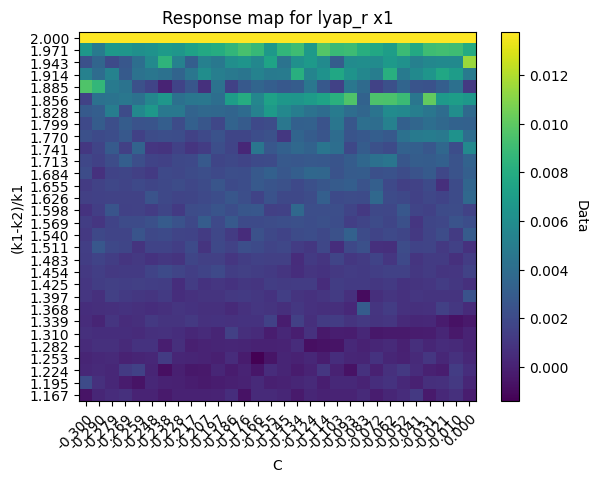

In [75]:
K = []
C = []
for i, c in tqdm(enumerate(c_vals)):
    C.append(c)
for j, k2 in enumerate(k2_vals):
    K.append((k2+0.3)/(-0.3))
        

# plt.imshow(Rmap, cmap='viridis', origin='lower', aspect='auto',)
fig, ax = plt.subplots()
im = ax.imshow(lyap_map_x1, cmap='viridis', origin='lower', aspect='auto',)

# Set tick labels
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(K)))
ax.set_xticklabels([f"{c:.3f}" for c in C])
ax.set_yticklabels([f"{k:.3f}" for k in K])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Data', rotation=-90, va="bottom")

# Add axis labels
ax.set_xlabel('C')
ax.set_ylabel('(k1-k2)/k1')
ax.set_title("Response map for lyap_r x1")
# Show plot
plt.show()

30it [00:00, 447790.46it/s]


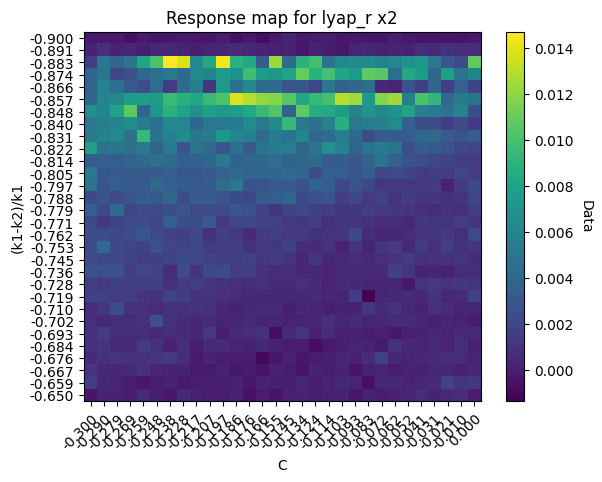

In [76]:
K = []
C = []
for i, c in tqdm(enumerate(c_vals)):
    C.append(c)
# for j, k2 in enumerate(k2_vals):
#     K.append((k2+0.3)/(-0.3))
for k2 in k2_vals:
    K.append(k2)

# plt.imshow(Rmap, cmap='viridis', origin='lower', aspect='auto',)
fig, ax = plt.subplots()
im = ax.imshow(lyap_map_x2, cmap='viridis', origin='lower', aspect='auto',)

# Set tick labels
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(K)))
ax.set_xticklabels([f"{c:.3f}" for c in C])
ax.set_yticklabels([f"{k:.3f}" for k in K])

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Data', rotation=-90, va="bottom")

# Add axis labels
ax.set_xlabel('C')
ax.set_ylabel('(k1-k2)/k1')
ax.set_title("Response map for lyap_r x2")
# Show plot
plt.show()

In [77]:
k1 = -0.3
k2 = -0.872
c = -0.200
# k1 = -0.3
# k2 = -0.68
# c = -0.3
sol = solve_ivp(fitzhugh_nagumo_coupled, t_span, xy0, args=(alpha,w2,a,b,c,k1,k2), t_eval=t_eval, dense_output=True,rtol=1e-8)
t = sol.t
s1 = sol.y[0]
s2 = sol.y[2]

In [78]:
nolds.lyap_r(s1)

/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.001075388972920503

In [79]:
nolds.lyap_r(s2)

/Users/timgu/opt/anaconda3/envs/ece1786/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


0.0003521320515108973

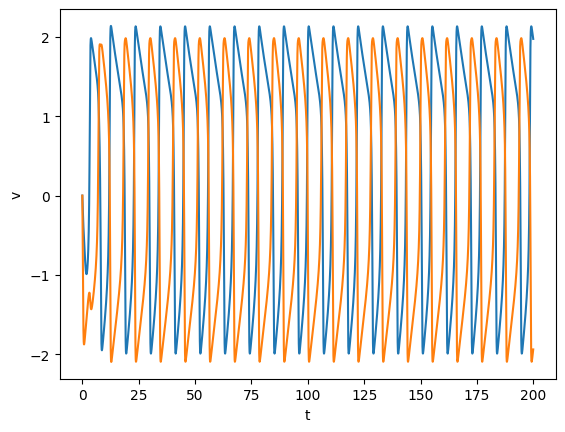

In [80]:
# plt.plot(t[0:100], (np.abs(np.fft.fft(v))**2)[0:100])
plt.plot(t, s1)
plt.plot(t, s2)
plt.xlabel('t')
plt.ylabel('v')
plt.show()